# Modelo de Ising cuántico unidimensional en una grilla de N espínes: Dinámica de muchos cuerpos ###

## FS-0432: Física Computacional

## Integrantes:

C02637 Andrés Díaz Pereira \
C24634 Felipe Mata \
C05127 Julyana Mora García \
890465 Patricio Becerra Barrios \
C27118 Sebastián José Salazar Chaves

# Dinámica de sistemas cuánticos

Consideremos un sistema compuesto de $N$ espines 1/2, descrito por el `Hamiltonian` ($\hbar = 1$):

\begin{equation}
\hat{H} = \sum_{i=1}^{N-1} J\hat{\sigma}^z_i \hat{\sigma}^z_{i+1} + \sum_{i=1}^N g\hat{\sigma}^x_i,
\end{equation}

donde el primer término corresponde a una interacción de vecinos cercanos en la dirección $z$, mientras que el segundo término genera dinámica coherente entre los espines que componen el sistema. El `Hamiltonian` anterior es el Hamiltoniano del modelo de Ising cuántico de ferromagnetismo en una dimensión.

Podemos construir el `Hamiltonian` denotado al inicio utilizando productos tensoriales de cada uno de los espacios de Hilbert que componen el sistema. Por ejemplo:
\begin{gather}
\
\hat{\sigma}^z_1 = \hat{\sigma}^z \otimes \mathbb{1} \otimes \mathbb{1} \otimes \cdots \otimes  \mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1}, \\
\
\hat{\sigma}^z_2 = \mathbb{1} \otimes \hat{\sigma}^z \otimes \mathbb{1} \otimes \cdots \otimes  \mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1}, \\
\
\hat{\sigma}^z_3 = \mathbb{1} \otimes \mathbb{1} \otimes \hat{\sigma}^z \otimes \cdots \otimes  \mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1}, \\
\
\\
\vdots \\
\\
\
\hat{\sigma}^z_{N-2} = \mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1} \otimes \cdots \otimes \hat{\sigma}^z \otimes \mathbb{1} \otimes \mathbb{1}, \\
\
\hat{\sigma}^z_{N-1} = \mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1} \otimes \cdots \otimes  \mathbb{1} \otimes \hat{\sigma}^z \otimes \mathbb{1}, \\
\
\hat{\sigma}^z_{N} = \mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1} \otimes \cdots \otimes  \mathbb{1} \otimes \mathbb{1} \otimes \hat{\sigma}^z \\
\
\end{gather}

Donde:

* $\otimes$ corresponde al producto tensorial.

* $\mathbb{1}$ a la matrix identidad $2x2$.

* $\hat{\sigma}^z$ es la matriz de Pauli en $z$ 

De esta forma se realizan $N-1$ productos tensoriales para el cálculo de cada $\hat{\sigma}^z_i$. Esto tambíen aplica para calcular los $\hat{\sigma}^x_i$

Con la librería `QuTip` obtener fácilmente las matrices de Pauli de $z$ y $x$, además nos permite realizar el producto tensorial entre los elmentos de un arreglo de forma ordenada.

In [4]:
import qutip as qt # Librería QuTip: La principal funcionalidad que ocupamos de esta librería es la 
                   # función "tensor", la cual realiza el producto tensorial entre los elementos de un arreglo
import numpy as np

Para que `QuTip` pueda realizar el producto tensorial, los objetos del arreglo deben ser de tipo `Qobj`. Por esto las matrices de Pauli y la matriz identidad debemos definirlas con funciones de `Qutip`:

In [5]:
sx = qt.sigmax() # Pauli X
sz = qt.sigmaz() # Pauli Z

iden = qt.qeye(2) # Identidad de tamaño 2

N = 2

Y con éstas matrices podemos representar el `Hamiltoniano` utilizando el producto tensorial (`qt.tensor()`):

In [6]:
# Esta rutina devuelve una matrix 2^Nx2^N que corresponde al modelo de Ising para N espines

def hamiltonian(J, g, N):
    
    sigma_z = [0] * N  # Vectores donde se van a guardar los sigma^z_i y los sigma^x_i
    sigma_x = [0] * N  # Se crean los arreglos de esta forma para evitar hacer "append"
    
    for i in range(N):
        
        sigma_zi = [0] * N  # Vectores donde se van a guardar las matrices 2x2 a las que se les va a
        sigma_xi = [0] * N  # aplicar el producto tensorial
        
        for j in range(i):
            
            sigma_zi[j] = (iden)  # Se guardan las matrices identidad que van antes de la i-ésima posición
            sigma_xi[j] = (iden)
        
        sigma_zi[i] = (sz)  # Se guarda la matriz de Pauli en la i-ésima posición
        sigma_xi[i] = (sx)
        
        for k in range(i+1,N):
                
            sigma_zi[k] = (iden) # Se guardan las matrices identidad que van después de la i-ésima posición
            sigma_xi[k] = (iden)
        
        sigma_z[i] = (qt.tensor(sigma_zi)).full() # Producto tensorial empezando en la primera posición hasta la
        sigma_x[i] = (qt.tensor(sigma_xi)).full() # última posición de los elementos del vector sigma_zi
    
        
    
    h_first = 0.0  # Primer término del hamiltoniano
    h_second = 0.0 # Segundo término del hamiltoniano
    
    for i in range(N): # Empieza en -1 porque en python si el índice de un arreglo es negativo, recorre 
                             # el arreglo al revés, así el índice -1 accede a la posoción N-1 de nuestro arreglo
                             # Para que las condiciones de frontera sean periódicas pensamos en hacer un 'if',
                             # pero nos pareció mejor esta forma

        h_first += J*np.dot(sigma_z[i], sigma_z[(i+1)%N])

    for i in range(N):

        h_second += g*np.array(sigma_x[i])

    
    return (h_first + h_second), sigma_z


El `Hamiltoniano` va a ser una matriz de dimensiones ($2^N \cdot 2^N$) que describe la dinámica interna del sistema, por ejemplo:

In [7]:
print(hamiltonian(2.0, 1.0, N)[0])

[[ 4.+0.j  1.+0.j  1.+0.j  0.+0.j]
 [ 1.+0.j -4.+0.j  0.+0.j  1.+0.j]
 [ 1.+0.j  0.+0.j -4.+0.j  1.+0.j]
 [ 0.+0.j  1.+0.j  1.+0.j  4.+0.j]]


Ahora necesitamos un `estado puro` inicial. Podemos escoger un estado arbitrario en el que solo el último espín apunta hacia abajo y todos los demás hacia arriba en la dirección $z$, el cual podemos representar de la siguiente forma:

In [8]:
psi_init = np.zeros(2**N)
psi_init[1] = 1.0

print(psi_init)

[0. 1. 0. 0.]


## Resolver la ecuación de Schrödinger con métodos numéricos

La dinámica de un estado puro se describe mediante la $\textit{ecuación de Schrödinger}$, la cuál está dada por:
\begin{equation}
\frac{d\hat{\psi}(t)}{dt} = -{\rm{i}} \hat{H}|\psi(t) \rangle,
\end{equation}

In [9]:
def schrodinger(ham, psi):

    return -1.0j*(np.dot(ham, psi))

Ahora vamos a resolver la $\textit{ecuación diferencial de Schrödinger}$ numéricamente mediante el método de $\textit{Runge Kutta 4}$:

In [10]:
def rk4(func, ham, y_n, h):

    k_1 = func(ham ,y_n) 

    k_2 = func(ham ,y_n + (h/2) * k_1)

    k_3 = func(ham ,y_n + (h/2) * k_2)

    k_4 = func(ham ,y_n + h * k_3)

    return y_n + (h/6)*(k_1+2*k_2+2*k_3+k_4)

Definimos los parámetros del $\textit{Hamiltoniano}$:

In [11]:
Jt = 3.0
gt = 1.5

Hamiltonian, Sz = hamiltonian(Jt, gt, N)

Luego discretizamos el tiempo de $0$ a $25$ segundos y definimos el paso:

In [12]:
times = np.linspace(0.0, 25.0, 2001)
h = times[1] - times[0]

Queremos calcular los valores de expectación de la polarización en la dirección de cada espín, es decir, el valor de expectación de los `Sz` los cuales obtuvimos cuando calculmos el $\textit{Hamiltoniano}$. Los valores de expectación se calculan:

\begin{equation}
\ \langle S_z \rangle = \langle \psi(t) | S_z | \psi(t) \rangle,
\end{equation}

Ahora creamos un arreglo donde vamos a guardar los valores de expectación de cada espín en un tiempo dado:

In [13]:
obs = np.zeros((N,times.size), dtype=complex)

Ahora aplicamos $\textit{Runge Kutta 4}$ iterativamente y guardamos los valores de expectación en cada iteración para después graficarlos:

In [14]:
psi_0 = psi_init
for tt in range(times.size):
    
    # Se calculan los valores de expectación de los Sz's utilizando psi_0
    valor_exp = [ np.dot( np.dot(psi_0.conjugate().transpose(), Sz[i]) , psi_0) for i in range(N)]

    # Se asignan los valores al índice y tiempo correspondiente de obs
    for i in range(N):
        obs[i][tt] = valor_exp[i]
    
    # Se invoque rk4 operando sobre psi_0 y se devuelve el resultado a un nuevo psi_n
    psi_n=rk4(schrodinger, Hamiltonian, psi_0,h)
    
    # Ahora creamos un shallow copy de psi_n en psi_0
    # De esta manera, en la siguiente iteración, el operador de esta iteración se convierte en el inicial
    # de la siguiente iteración
    psi_0=psi_n

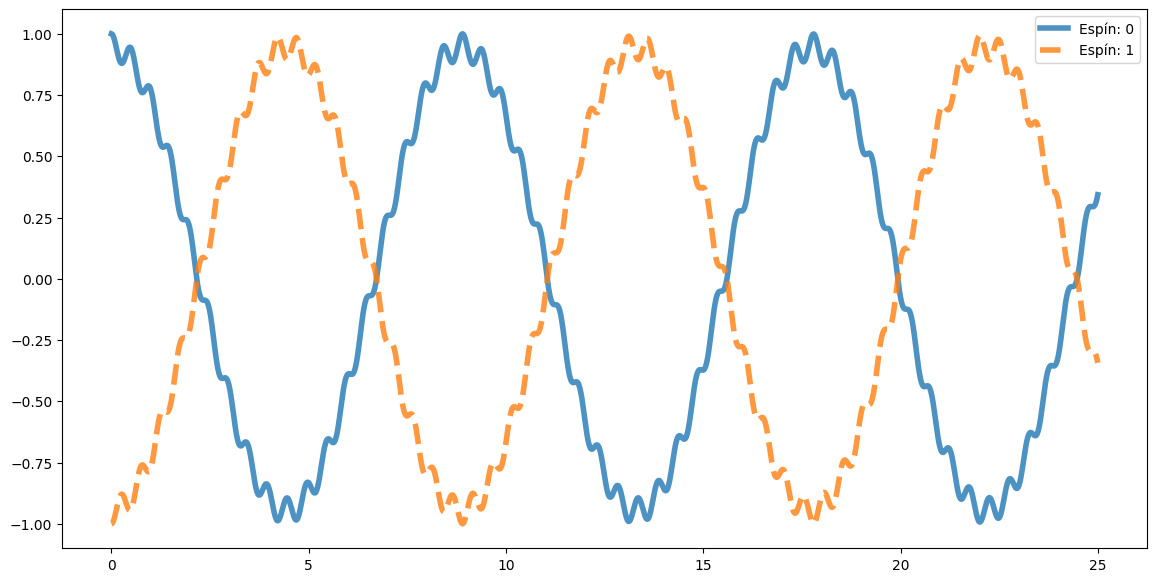

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

ls=['-','--','-.',':']

for i in range(N):
    plt.plot(times, np.real(obs[i]), 
             linestyle=ls[i%4], 
             linewidth=4,
             alpha=0.8,
             label='Espín: {0}'.format(i))

plt.legend()
plt.show()

## Exponencial